In [61]:
import pandas as pd
data=pd.read_csv("data.csv",delimiter=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [62]:

# Checking for missing values
missing_values = data.isnull().sum()

# Examining data types
data_types = data.dtypes

# Checking for duplicate entries
duplicate_entries = data.duplicated().sum()

missing_values, data_types, duplicate_entries


(Marital status                                    0
 Application mode                                  0
 Application order                                 0
 Course                                            0
 Daytime/evening attendance\t                      0
 Previous qualification                            0
 Previous qualification (grade)                    0
 Nacionality                                       0
 Mother's qualification                            0
 Father's qualification                            0
 Mother's occupation                               0
 Father's occupation                               0
 Admission grade                                   0
 Displaced                                         0
 Educational special needs                         0
 Debtor                                            0
 Tuition fees up to date                           0
 Gender                                            0
 Scholarship holder                           

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


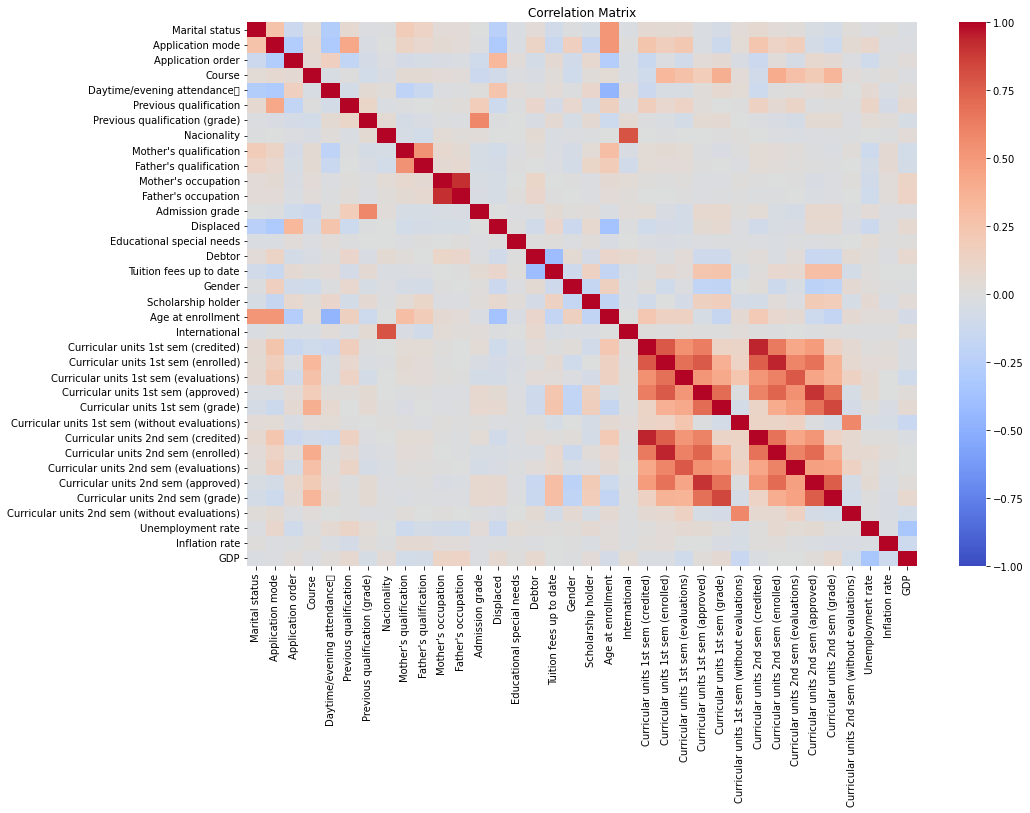

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation analysis
correlation_matrix = data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',vmax=1,vmin=-1)
plt.title("Correlation Matrix")
plt.show()


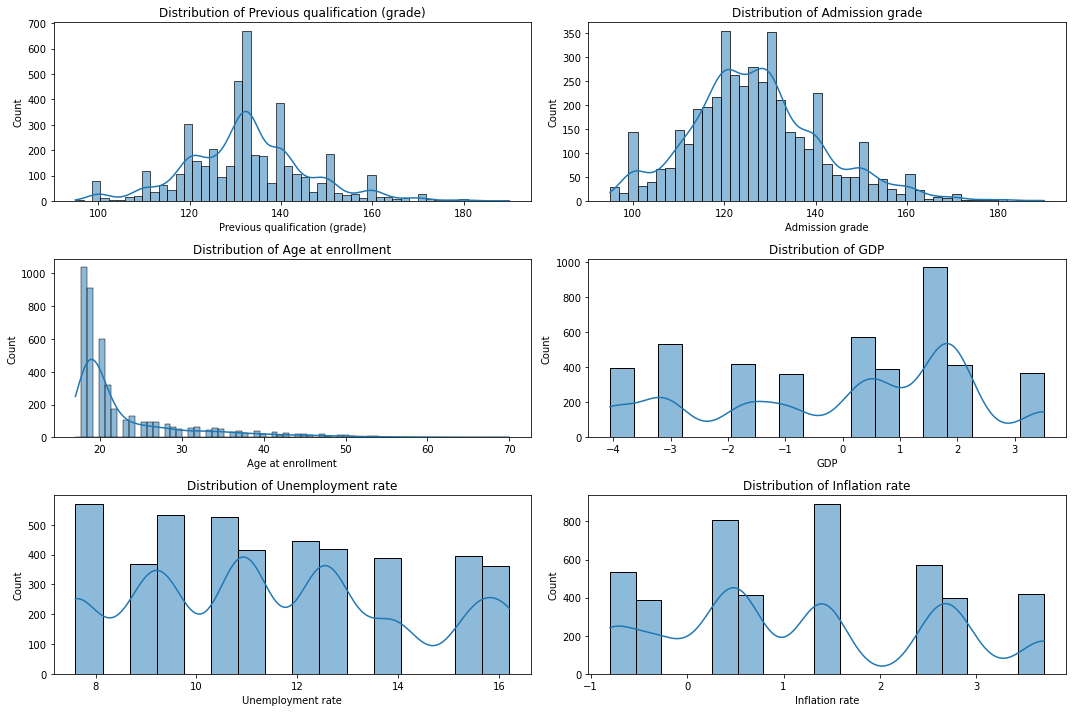

In [64]:
# Selecting a few key numerical columns for histograms
selected_columns = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'GDP', 'Unemployment rate', 'Inflation rate']

# Plotting histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


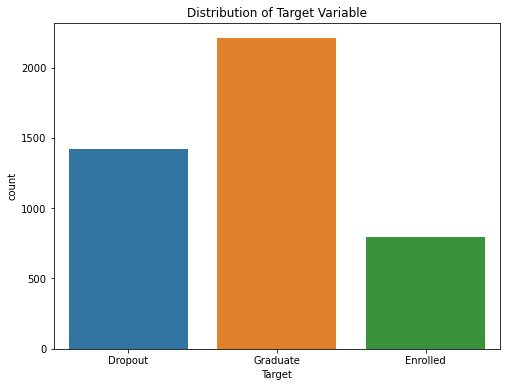

In [65]:
# Bar plot for the 'Target' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

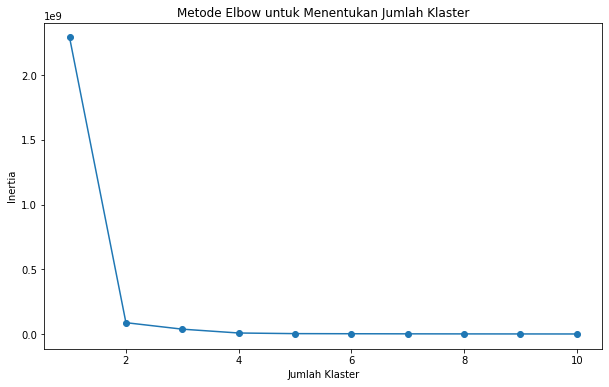

In [66]:
# Menghapus kolom kategorikal
numerical_data = data.select_dtypes(include=[int, float])


data_subset = numerical_data.sample(frac=0.1, random_state=1)

# Menghitung ulang nilai inertia untuk setiap jumlah klaster
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_subset)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.show()


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


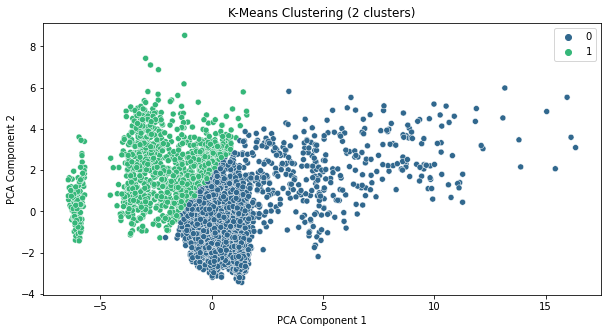

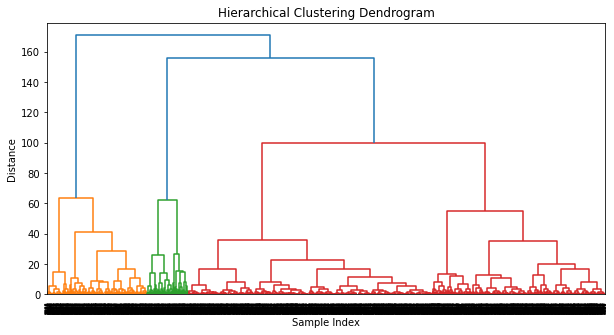

In [67]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Menghilangkan kolom target untuk proses clustering
data_clustering = data.drop('Target', axis=1)

# Melakukan standardisasi pada data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

# Mengurangi dimensi data menggunakan PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Menerapkan K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters_kmeans = kmeans.fit_predict(data_pca)

# Visualisasi hasil K-Means Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(data_pca[:, 0], data_pca[:, 1], hue=clusters_kmeans, palette='viridis')
plt.title('K-Means Clustering (2 clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Menerapkan Hierarchical Clustering
hierarchical = linkage(data_pca, method='ward')

# Visualisasi Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(hierarchical)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Mengubah variabel target menjadi numerik

data['Target'] = data['Target'].map({'Dropout': 0, 'Graduate': 1,'Enrolled':3})

# Membagi data menjadi set pelatihan dan pengujian
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Membuat dan melatih model Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=0)
lr_model.fit(X_train, y_train)

# Memprediksi dan mengevaluasi model Random Forest
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Memprediksi dan mengevaluasi model Logistic Regression
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)

(rf_accuracy, lr_accuracy), (rf_report, lr_report)


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


((0.7936746987951807, 0.7567771084337349),
 ('              precision    recall  f1-score   support\n\n           0       0.82      0.76      0.79       428\n           1       0.81      0.95      0.88       667\n           3       0.62      0.41      0.49       233\n\n    accuracy                           0.79      1328\n   macro avg       0.75      0.71      0.72      1328\nweighted avg       0.78      0.79      0.78      1328\n',
  '              precision    recall  f1-score   support\n\n           0       0.76      0.76      0.76       428\n           1       0.77      0.94      0.85       667\n           3       0.63      0.23      0.33       233\n\n    accuracy                           0.76      1328\n   macro avg       0.72      0.64      0.65      1328\nweighted avg       0.74      0.76      0.73      1328\n'))